In [ ]:
import mdtraj
import numpy as np
file_name = '/home/jiangdapeng/PepGLAD/results/fixseq/references/1bjr_ref.pdb'

# MDtraj
traj = mdtraj.load(file_name)
# SS calculation
pdb_ss = mdtraj.compute_dssp(traj, simplified=True)[0]  # (L, )

ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}
print("ss_count", ss_count)

ss_count {'alpha': 79, 'beta': 65}


In [17]:
# 获取拓扑对象
topology = traj.topology

# 遍历链并打印编号和链的名称
for chain in topology.chains:
    print(f"链编号: {chain.index}")

链编号: 0
链编号: 1


In [2]:
import mdtraj as md
import numpy as np

file_name = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates/1bjr/1bjr_gen_0.pdb'

# Load the PDB file and select chain B
traj = md.load(file_name)
topology = traj.topology
chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

# Slice the trajectory to only include chain B
traj_chain_B = traj.atom_slice(chain_B_atoms)

# Compute secondary structure for chain B
pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

# Count the secondary structure elements
ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}
print("ss_count for chain B", ss_count)
print("pdb_ss for chain B", pdb_ss)

ss_count for chain B {'alpha': 0, 'beta': 0}
pdb_ss for chain B [' ' ' ' ' ' 'S' 'S' 'S' ' ' ' ' ' ' ' ']


In [4]:
import numpy as np
import os
import mdtraj as md
# directory = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates'
directory = '/home/jiangdapeng/PepGLAD/results/alpha_4/candidates'
strcture_count = 0
peptide_count = 0

for root, dirs, files in os.walk(directory):
    for file in files:
        file_name = os.path.join(root, file)
        traj = md.load(file_name)
        topology = traj.topology
        chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

        # Slice the trajectory to only include chain B
        traj_chain_B = traj.atom_slice(chain_B_atoms)

        # Compute secondary structure for chain B
        pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

        # Count the secondary structure elements
        ss_count = {
        'alpha': np.sum(pdb_ss == 'H'),
        'beta': np.sum(pdb_ss == 'E'),
        }
        if ss_count['alpha']!=0:
            print(file_name)
            print("ss_count for chain B", ss_count)
            strcture_count+=ss_count['alpha']
        peptide_count +=1
print(f'average structure{strcture_count/peptide_count}')

/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/5vao/5vao_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/2xyi/2xyi_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/1t5z/1t5z_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/4rs9/4rs9_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r42/3r42_gen_0.pdb
ss_count for chain B {'alpha': 5, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r7g/3r7g_gen_1.pdb
ss_count for chain B {'alpha': 8, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r7g/3r7g_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/4cy3/4cy3_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/2hw

In [7]:
from transformers import AutoTokenizer, AutoModel

model = AutoModel.from_pretrained("/data/private/jdp/scibert")
tokz = AutoTokenizer.from_pretrained("/data/private/jdp/scibert")

output_list = []
for i in range(0,40):
    inputs = tokz(f"The peptide has {i} alpha helices.", return_tensors="pt")
    outputs = model(**inputs)
    output_list.append(outputs['pooler_output'])

/data/private/jdp/envs/PepGLAD/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

from Bio import PDB

# 读取PDB文件
pdb_file = "/home/jiangdapeng/PepGLAD/results/prompt_codesign/candidates/6fq4/6fq4_gen_0.pdb"
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

chain_info = []
 
for model in structure:
    for chain in model:
        chain_id = chain.id
        sequence = []
        for residue in chain:
            if PDB.is_aa(residue, standard=True):  # 检查是否是标准氨基酸
                sequence.append(three_to_one(residue.resname))  # 转换三字母代码到单字母代码
        # 提取链的序列和长度
        seq_str = ''.join(sequence)
        chain_length = len(sequence)
        chain_info.append((chain_id, chain_length, seq_str))
 
# 打印链的信息
for chain_id, chain_length, seq_str in chain_info:
    print(f"链ID: {chain_id}, 长度: {chain_length}, 序列: {seq_str}")


链ID: A, 长度: 252, 序列: MPVFHTRTIESILEPVAQQISHLVIMHEEGEVDGKAIPDLTAPVSAVQAAVSNLVRVGKETVQTTEDQILKRDMPPAFIKVENACTKLVRAAQMLQADPYSVPARDYLIDGSRGILSGTSDLLLTFDEAEVRKIIRVCKGILEYLTVAEVVETMEDLVTYTKNLGPGMTKMAKMIDERQQELTHQEHRVMLVNSMNTVKELLPVLISAMKIFVTTKNTKSQGIEEALKNRNFTVEKMSAEINEIIRVLQLTS
链ID: B, 长度: 16, 序列: EVENEKDEVGFAYFQT


In [ ]:
# code to calculate the left hand side 

import numpy as np
import os
import mdtraj as md
from Bio import PDB
import json
# directory = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates'
# 手动定义三字母代码到单字母代码的映射
three_to_one_map= {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
    'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
    'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
    'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
}
def three_to_one(residue_name):
    return three_to_one_map.get(residue_name, 'X')  # 使用 'X' 处理未知残基
directory = '/home/jiangdapeng/PepGLAD/results/debug_version_left_hand_R_170/results.jsonl'
with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(directory)
strcture_count = 0
peptide_count = 0
chain_info = []
counter = 0
total_counter = 0
for root, dirs, files in os.walk(directory):
    for file in files:
        pdb_file = os.path.join(root, file)
        parser = PDB.PDBParser(QUIET=True)
        structure = parser.get_structure("protein", pdb_file)
        total_counter=total_counter+1
        model = structure[0]
        for idx,chain in enumerate(model):
            if idx==0:
                continue
            chain_id = chain.id
            sequence = []
            for residue in chain:
                if PDB.is_aa(residue, standard=True):  # 检查是否是标准氨基酸
                    sequence.append(three_to_one(residue.resname))  # 转换三字母代码到单字母代码
            # 提取链的序列和长度
            seq_str = ''.join(sequence)
            print(f'{seq_str},generate by {file}')
            if seq_str[0] == 'R': 
                counter=counter+1
            chain_length = len(sequence)
            chain_info.append((chain_id, chain_length, seq_str))

print(counter)
print(total_counter)

KeyError: 0

In [26]:
import json
directory = '/home/jiangdapeng/PepGLAD/results/R_5/results.jsonl'
counter = 0
total_counter = 0
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide = json_object['gen_seq']
            total_counter = total_counter+1
            if peptide[0] == 'R': 
                counter=counter+1
print(counter)
print(total_counter)
            



89
172


In [1]:
import json
import numpy as np
import os
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/results/alpha_4/results.jsonl'
counter = 0
total_counter = 0
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            total_counter = total_counter+1

            traj = md.load(peptide_path)
            topology = traj.topology
            chain_B_atoms = topology.select("chainid == 1")

            # Slice the trajectory to only include chain B
            traj_chain_B = traj.atom_slice(chain_B_atoms)

            # Compute secondary structure for chain B
            pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

            # Count the secondary structure elements
            ss_count = {
            'alpha': np.sum(pdb_ss == 'H'),
            'beta': np.sum(pdb_ss == 'E'),
            }
            if ss_count['alpha']!=0:
                number = ss_count['alpha']
                print(f'The number of alpha helices are {number}')
            if ss_count['alpha']==4:
                counter=counter+1
print(counter)
print(total_counter)

The number of alpha helices are 5
The number of alpha helices are 4
The number of alpha helices are 8
The number of alpha helices are 5
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 5
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
17
172


In [ ]:
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/ckpts/LDM_codesign/version_173/results/results.jsonl'
counter = 0
total_counter = 0
distance_list = []
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            # 提取指定链
            
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            
            # 获取链中第一个和最后一个氨基酸
            residues = list(chain.get_residues())
            first_residue = residues[0]
            last_residue = residues[-1]
            
            # 提取N端和C端原子坐标
            first_atom = first_residue['N']  # N端的氮原子
            last_atom = last_residue['C']   # C端的羧基碳原子
            # 计算欧几里得距离
            distance = np.linalg.norm(first_atom.coord - last_atom.coord)
            distance_list.append(distance)
            print(distance)

print(f'mean distance is {np.mean(distance_list)}')
# print(interst_path)



IsADirectoryError: [Errno 21] Is a directory: '/home/jiangdapeng/PepGLAD/ckpts/LDM_codesign/version_173/results'

In [19]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 假设你有一个包含20个torch tensor的列表，维度为 (embedding_dim,)
embeddings_tensor = torch.cat(output_list,dim=0)  # 转换为矩阵 (20, embedding_dim)

# # 使用PCA降维到2D
# pca = PCA(n_components=2)
# embeddings_2d = pca.fit_transform(embeddings_tensor.cpu().detach().numpy())

# 如果想使用t-SNE，也可以使用以下代码代替PCA：
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_tensor.cpu().detach().numpy())

# 绘制散点图
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f"{i+1}子结构")
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], f"{i+1}", fontsize=9)

plt.title("蛋白质子结构的Embedding分布")
plt.xlabel("降维后的第1主成分")
plt.ylabel("降维后的第2主成分")
plt.legend(title="子结构数量", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

ValueError: perplexity must be less than n_samples

In [ ]:
import mdtraj as md
import numpy as np

file_name = '/home/jiangdapeng/PepGLAD/output/codesign/1ssc_A_B_5.pdb'

# Load the PDB file and select chain B
traj = md.load(file_name)
topology = traj.topology
chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

# Slice the trajectory to only include chain B
traj_chain_B = traj.atom_slice(chain_B_atoms)

# Compute secondary structure for chain B
pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

# Count the secondary structure elements
ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}

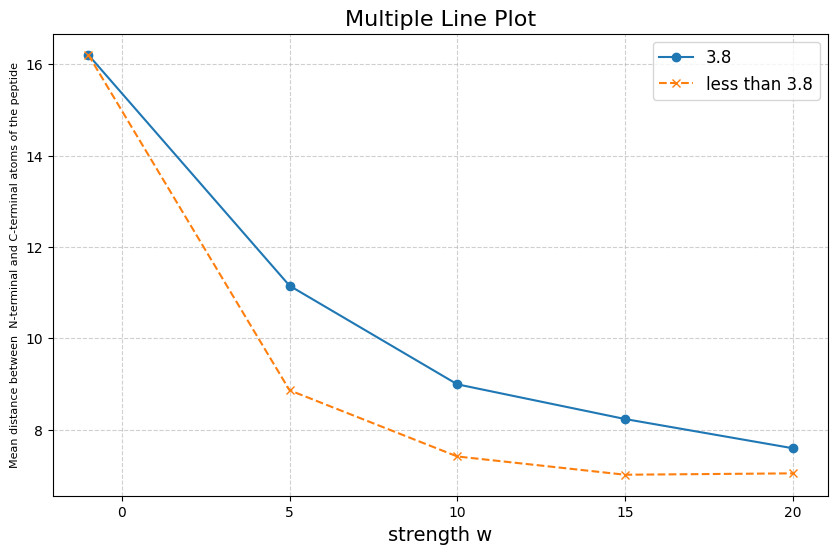

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x = [-1,5,10,15,20] # x 轴数据
y1 =[16.21,11.15,8.99,8.23,7.59]  # 第一条折线数据
y2 = [16.21,8.86,7.41,7.01,7.04]  # 第二条折线数据
# y3 = np.sin(x) + np.cos(x)  # 第三条折线数据

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制多条折线
plt.plot(x, y1, label='3.8', linestyle='-', marker='o')
plt.plot(x, y2, label='less than 3.8', linestyle='--', marker='x')
# plt.plot(x, y3, label='y = sin(x) + cos(x)', linestyle='-.', marker='s')

# 添加标题和标签
plt.title('Multiple Line Plot', fontsize=16)
plt.xlabel('strength w', fontsize=14)
plt.ylabel('Mean distance between  N-terminal and C-terminal atoms of the peptide', fontsize=8)

# 添加图例
plt.legend(fontsize=12)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.show()


In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import os
os.environ["TRANSFORMERS_CACHE"] = "/path/to/your/cache_dir"
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
# 设置 Hugging Face 的 API 端点镜像
cache_dir = '/data/private/jdp'
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto",
    cache_dir = cache_dir
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    cache_dir = cache_dir
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like Qwen/Qwen2.5-1.5B-Instruct is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.